In [1]:
from pykat import finesse        
from pykat.commands import *    
import numpy as np               
import matplotlib.pyplot as plt  

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
basekat = finesse.kat() 
basekat.verbose = False

In [4]:
basekat.parse("""
l laser 1 0 n0
s s0 0.1 n0 n1

            # the cavity:
        m1 M1 0.15 0 0 n1 n2
        s scav 0.2 n2 n3
        m1 M2 0.15 0 0 n3 n4
        """)

In [5]:
kat = basekat.deepcopy()
kat.s0.remove()

In [6]:
f_mod = 100e6
kat.parse("""
                # modulator
            
            s smod 0 n0 nmod1
            mod eom {f} 0.3 1 pm nmod1 nmod2
            s s0 0 nmod2 n1
                # photodiode and xaxis
            pd1 PDH {f} 0 n1
            xaxis M2 phi lin -150 150 400
""".format(f=f_mod))

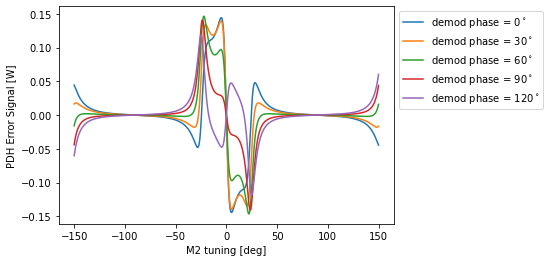

In [7]:
for P in [0, 30, 60, 90, 120]:
    k = kat.deepcopy()
    k.PDH.phase1 = P
    out = k.run()
    plt.plot(out.x, out["PDH"], label='demod phase = {}$^\circ$'.format(P))
plt.xlabel('M2 tuning [deg]')
plt.ylabel('PDH Error Signal [W]')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

In [9]:
kat2 = kat.deepcopy()
kat2.parse("pd Pcirc n3")
out = kat2.run()

Text(0.5, 0, 'M2 tuning [deg]')

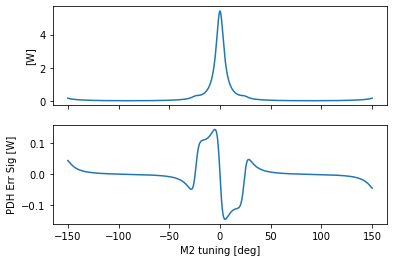

In [10]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(out.x, out['Pcirc'], label="M1 phi = 0Â°")
ax[0].set_ylabel('[W]')
ax[1].plot(out.x, out['PDH'])
ax[1].set_ylabel('PDH Err Sig [W]')
ax[1].set_xlabel('M2 tuning [deg]')

In [11]:
kat3 = kat2.deepcopy()
kat3.M1.phi = 3
out = kat3.run()

In [12]:
ax[0].plot(out.x, out['Pcirc'], label="M1 phi = 3Â°")
ax[1].plot(out.x, out['PDH'])
ax[0].legend()
plt.show()


Removed existing object 'xaxis' of type <class
'pykat.commands.xaxis'> to add line 'xaxis M2 phi lin 0 100
200'

Parsing `set err PDH re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2021-02-21 00:43:39.054072
100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 56/10000)   Used Finesse None at C:\Users\Parivesh\anaconda3\envs\finesse\Library\bin\kat.exe

Finished in 0.234712 seconds


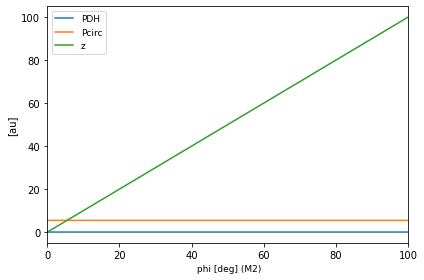

In [13]:
kat4 = kat2.deepcopy()
kat4.verbose = True
kat4.parse("""
            xaxis M2 phi lin 0 100 200
            set err PDH re 
            lock z $err -1 1m
            put* M1 phi $z
""")
out = kat4.run()
out.plot()